<a href="https://colab.research.google.com/github/yiheng870106/Mathematics-of-Data-Science-Project-1-yiheng/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [ ]:
# test4

# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [42]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


Intercept: -36.85856910680128
Coefficients: [ 4.33333407e-01  9.29324337e-03 -9.86433739e-02  5.93215487e-01
 -7.56192502e-06 -4.74516383e-03 -4.21449336e-01 -4.34166041e-01]
      Feature  Coefficent
0      MedInc    0.433333
1    HouseAge    0.009293
2    AveRooms   -0.098643
3   AveBedrms    0.593215
4  Population   -0.000008
5    AveOccup   -0.004745
6    Latitude   -0.421449
7   Longitude   -0.434166


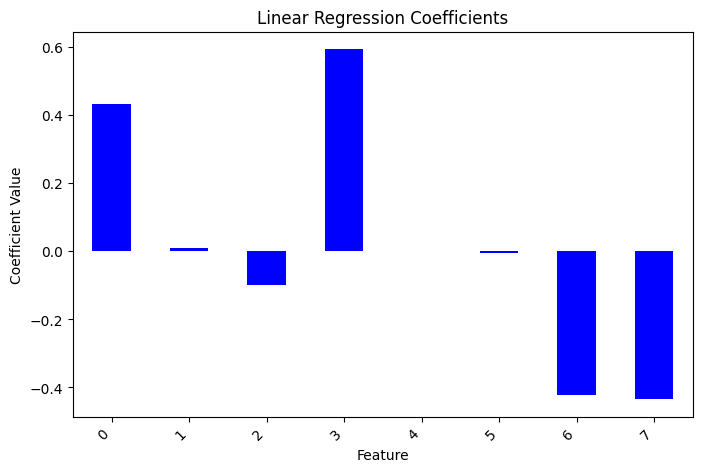

In [44]:
# write code to regress the median house value for California districts on the eight predictor variables. You can use scikit-learn or another python package for the analysis.
#------------------

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

# print coefficients as table
coef_df=pd.DataFrame({
    "Feature": feature_names,
    "Coefficent": model.coef_
})
print(coef_df)

# Visualize feature coefficients as vertical bar chart
coef_df.plot(kind="bar",figsize=(8,5),legend=False,color="blue")
plt.title("Linear Regression Coefficients")
plt.ylabel("Coefficient Value")
plt.xlabel("Feature")
plt.xticks(rotation=45,ha="right")
plt.show()

In [ ]:
# You may exclude predictive variables if necessary, but explain why in the project report.
#------------------

In [45]:
# Report the train/test r2, MAE, and RMSE values.
#------------------
y_pred=model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print("R^2:",r2)
print("MAE:",mae)
print("RMSE:",rmse)


R^2: 0.5943232652466202
MAE: 0.535126133655451
RMSE: 0.7273129773603114


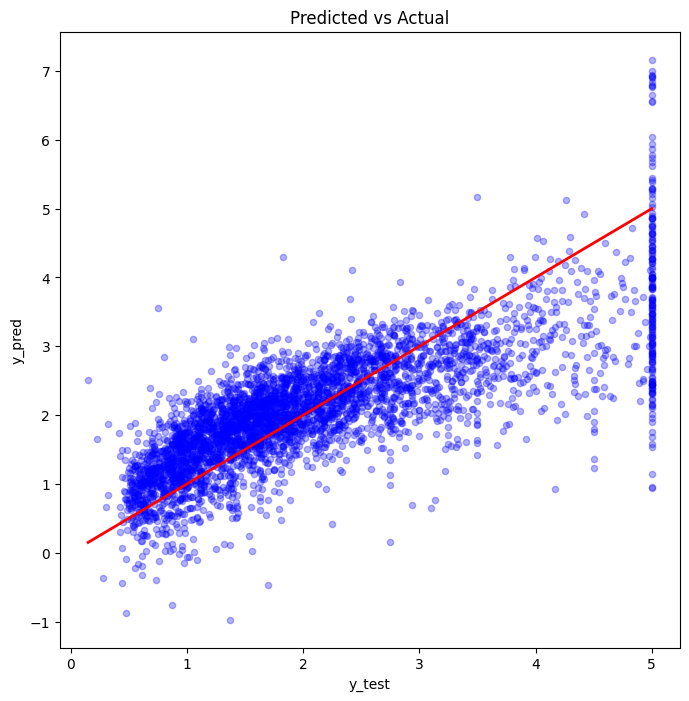

In [46]:
# Include a scatterplot of the predicted vs. true median house values.
#------------------

pred_df=pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred
})
pred_df.plot.scatter(x="y_test",y="y_pred",alpha=0.3,figsize=(8,8),color="blue")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r-',lw=2)
plt.title("Predicted vs Actual")
plt.show()

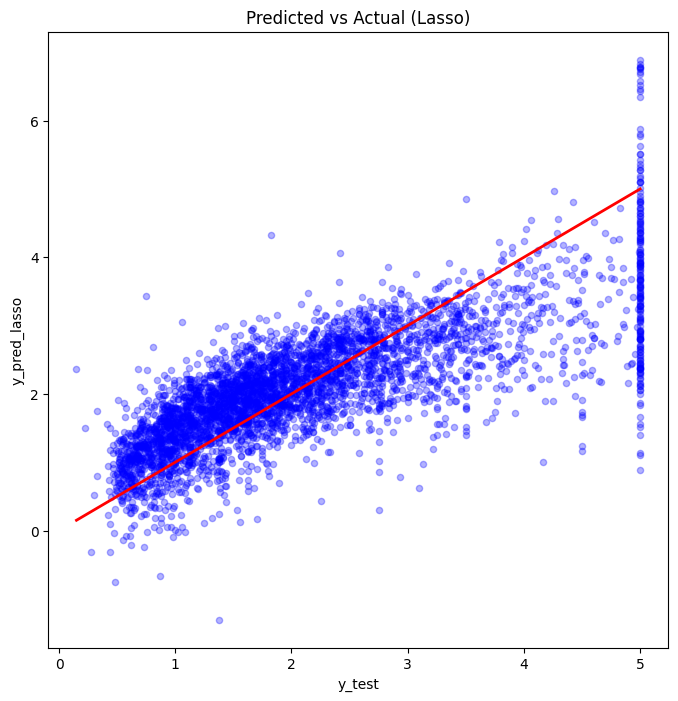

In [50]:
# Explore other regression methods on this dataset.
#------------------
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

pred_lasso_df=pd.DataFrame({
    "y_test": y_test,
    "y_pred_lasso": y_pred_lasso
})
pred_lasso_df.plot.scatter(x="y_test",y="y_pred_lasso",alpha=0.3,figsize=(8,8),color="blue")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r-',lw=2)
plt.title("Predicted vs Actual (Lasso)")
plt.show()

In [ ]:
# Include a histogram of your model error.
#------------------

# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [ ]:
# your code here